In [1]:
def df_string_list(str_p):
#str_p = df_subO_EP3_['Classes'][0][1:]
    str_p = str_p.replace('[','')
    str_p = str_p.replace(']','')

    strs = str_p.split(', ')
    return strs

def df_string_listB(str_p):
    try:
        strs = str_p.split('-')
    except:
        strs = ''
    return strs



### IMPORT CSV file for Organism/Classes Dataframe

In [2]:
import pandas as pd

df_sub_ = pd.read_csv('./out_CLASSES_utf_DOMAIN.csv', encoding='utf-8', sep=',')
df_sub_.head(2)

def df_string_listC(str_p):
    try:
        strs = str_p.split(', ')
    except:
        strs = ''
    return strs

df_sub_['Classes'] = df_sub_.Classes.map(lambda x: df_string_listC(x))

df_sub_['Classes'].loc[0] #[2]

[u'[[',
 u'Deinococcus',
 u'Deinococcaceae',
 u'Deinococcales',
 u'Deinococci',
 u'Deinococcus',
 u'Thermus',
 u'Bacteria',
 u'cellular organisms',
 u'life0]]']

In [3]:
import numpy as np #############THIS TAKES TIME, PROBABLY SHOULD PICKLE THIS##############

# df_classesB['Taxon'] = ''

# print len(df_classesB)

# for i in df_classesB.index.values:
#     #print i
#     try:
#         df_classesB['Taxon'][i] = str(main_match([df_classesB['Names'][i]])) #API for Taxon in Open Tree!!!
#     except:
#         pass

# df_classesB.tail(10)

In [4]:
# READ in CSV file Taxonomy dataframe (Names of Taxons)
import pandas as pd

df_TAXONOMY = pd.read_csv('./out_TAXONOMY.csv', encoding='utf-8', sep=',')
df_TAXONOMY.head(5)

,Unnamed: 0,Names,Classes,Taxon
0,996,Oligotropha,1,genus
1,1336,Gallus,1,genus
2,1335,Viviparidae,1,family
3,1334,Aneurinibacillus group,1,no rank
4,1333,Apini,1,tribe


In [5]:
################ CLASS COUNTS for list to REMOVE TAXONOMIES that occur less than 12x

df_classesB = df_TAXONOMY
df_classesB = df_classesB[df_classesB['Classes'] >= 10] #Mask for Classes with >= 10 counts

df_classesB['Names'] = df_classesB['Names'].map(lambda x: str(x))


df_TAXONOMY = df_classesB
df_TAXONOMY.head(3)

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,Names,Classes,Taxon
1718,253,Thermoproteaceae,10,family
1719,257,Natrialbales,10,order
1720,256,Thaumarchaeota,10,phylum


In [6]:
df_TAXONOMY[df_TAXONOMY['Taxon']=='domain']

,Unnamed: 0,Names,Classes,Taxon
1980,13,Archaea,179,domain
1981,12,Eukaryota,207,domain
1989,4,Bacteria,1968,domain


In [7]:
len(df_TAXONOMY[df_TAXONOMY['Taxon']=='phylum'])

23

In [8]:
#Group by Taxons:

group_with_Names = pd.DataFrame(df_TAXONOMY.groupby(['Taxon','Names'], as_index = False).sum())
group_just_Taxon = df_TAXONOMY['Classes'].groupby(df_TAXONOMY['Taxon']).sum()
#df_Taxon = pd.DataFrame(group.sum())



In [9]:
group_just_Taxon

Taxon
class                 1800
domain                2354
family                1281
genus                  671
infraclass              27
infrakingdom            22
infraorder              11
kingdom                173
no rank               3969
no rank - terminal     193
order                 1819
parvorder               10
phylum                2419
subclass                60
suborder                11
subphylum               15
superclass             110
superorder              15
tribe                   26
Name: Classes, dtype: int64

Get Names of particular Taxon category for each organism. It is faster to check for a particular selected level of Taxonomy (eg, Species up to Kingdom/Domain) in each organism's list of Taxonomy against the master list of which we got from value counts of the list of all Taxonomies. Generally, I think it's more practical to look at one level of Taxonomy at a time. 

In [10]:
#Let's do kingdom first = classes_list
classes_list_1 = group_with_Names[group_with_Names['Taxon'] =='domain']['Names'].tolist() #domain, infrakingdom
classes_list_0 = group_with_Names[group_with_Names['Taxon'] =='phylum']['Names'].tolist() #kingdom

In [11]:
classes_list_0

['Actinobacteria',
 'Apicomplexa',
 'Aquificae',
 'Arthropoda',
 'Ascomycota',
 'Bacteroidetes',
 'Chlamydiae',
 'Chlorobi',
 'Chloroflexi',
 'Chordata',
 'Crenarchaeota',
 'Cyanobacteria',
 'Euryarchaeota',
 'Firmicutes',
 'Magnoliophyta',
 'Opisthokonta',
 'Proteobacteria',
 'Spirochaetes',
 'Streptophyta',
 'Tenericutes',
 'Thaumarchaeota',
 'Thermotogae',
 'Tracheophyta']

In [12]:
classes_list_1

['Archaea', 'Bacteria', 'Eukaryota']

In [13]:
df_sub1_ = df_sub_

Add to Dataframe new Column "Taxonomy" - which gives Name of selected Taxonomy type.


In [14]:
df_sub1_ = df_sub_

species_n = len(df_sub1_)
classes_p = []

import numpy as np

#df_sub1_EP3B_['Organism'][13]

for i in df_sub1_.index.values:
    m = ''
    for k,l in enumerate(df_sub1_['Classes'][i]):
        print df_sub1_['Classes'][i][k]
        #print classes_list
        if df_sub1_['Classes'][i][k] in classes_list_0:
            m = df_sub1_['Classes'][i][k]
            print "Classes_list"
            break
        elif df_sub1_['Classes'][i][k] in classes_list_1:
            m = df_sub1_['Classes'][i][k]
            print "Classes_list0"
            break
        m = np.NaN
    classes_p.append(m)
    print m, " ",i
    
df_sub1_['Taxonomy'] = classes_p
df_sub1_.head(10)
#df_sub1_EP3B_[df_sub1_EP3B_['Classsub']=='']

[[
Deinococcus
Deinococcaceae
Deinococcales
Deinococci
Deinococcus
Thermus
Bacteria
Classes_list0
Bacteria   0
[[
Acaryochloris
FamilyI
SubsectionI
Cyanobacteria
Classes_list
Cyanobacteria   1
[[
Acetobacteraceae
Rhodospirillales
Alphaproteobacteria
Proteobacteria
Classes_list
Proteobacteria   2
[[
Acetobacter
Acetobacteraceae
Rhodospirillales
Alphaproteobacteria
Proteobacteria
Classes_list
Proteobacteria   3
[[
Acetobacter
Acetobacteraceae
Rhodospirillales
Alphaproteobacteria
Proteobacteria
Classes_list
Proteobacteria   4
[[
Acetobacter
Acetobacteraceae
Rhodospirillales
Alphaproteobacteria
Proteobacteria
Classes_list
Proteobacteria   5
[[
Acetobacterium
Eubacteriaceae
Clostridiales
Clostridia
Firmicutes
Classes_list
Firmicutes   6
[[
Acetohalobium
Halobacteroidaceae
Halanaerobiales
Clostridia
Firmicutes
Classes_list
Firmicutes   7
[[
Acholeplasma
Acholeplasmataceae
Acholeplasmatales
Mollicutes
Tenericutes
Classes_list
Tenericutes   8
[[
Acholeplasma
Acholeplasmataceae
Acholeplasmatale

,Unnamed: 0,Unnamed: 0.1,Organism,Kingdom,Size,Chr,url,RPR,GC,Classes,Classsub1,Taxonomy,_Cat
0,0,0,'Deinococcus soli' Cha et al. 2014,Bacteria,3.23698,1.0,/genome/38191,3038.0,70.2,"[[[, Deinococcus, Deinococcaceae, Deinococcale...","[Deinococcus, Deinococcaceae, Deinococcales, D...",Bacteria,Bacteria
1,1,12,Acaryochloris marina,Bacteria,8.36160,1.0,/genome/1179,7179.0,35.5,"[[[, Acaryochloris, FamilyI, SubsectionI, Cyan...","[Acaryochloris, FamilyI, SubsectionI, Cyanobac...",Cyanobacteria,Bacteria
2,2,13,Acetobacter,Bacteria,3.10640,1.0,/genome/18005,1775.0,57.1,"[[[, Acetobacteraceae, Rhodospirillales, Alpha...","[Acetobacter, Acetobacteraceae, Rhodospirillal...",Proteobacteria,Bacteria
3,3,14,Acetobacter ghanensis,Bacteria,2.84394,1.0,/genome/42306,2437.0,53.9,"[[[, Acetobacter, Acetobacteraceae, Rhodospiri...","[Acetobacter, Acetobacteraceae, Rhodospirillal...",Proteobacteria,Bacteria
4,4,15,Acetobacter pasteurianus,Bacteria,3.34025,1.0,/genome/904,2955.0,57.2,"[[[, Acetobacter, Acetobacteraceae, Rhodospiri...","[Acetobacter, Acetobacteraceae, Rhodospirillal...",Proteobacteria,Bacteria
5,5,16,Acetobacter senegalensis,Bacteria,3.96991,1.0,/genome/42303,3373.0,55.5,"[[[, Acetobacter, Acetobacteraceae, Rhodospiri...","[Acetobacter, Acetobacteraceae, Rhodospirillal...",Proteobacteria,Bacteria
6,6,17,Acetobacterium woodii,Bacteria,4.04478,1.0,/genome/11436,3521.0,36.6,"[[[, Acetobacterium, Eubacteriaceae, Clostridi...","[Acetobacterium, Eubacteriaceae, Clostridiales...",Firmicutes,Bacteria
7,7,18,Acetohalobium arabaticum,Bacteria,2.46960,1.0,/genome/1846,2286.0,50.4,"[[[, Acetohalobium, Halobacteroidaceae, Halana...","[Acetohalobium, Halobacteroidaceae, Halanaerob...",Firmicutes,Bacteria
8,8,24,Acholeplasma brassicae,Bacteria,1.87779,1.0,/genome/22962,1672.0,29.6,"[[[, Acholeplasma, Acholeplasmataceae, Acholep...","[Acholeplasma, Acholeplasmataceae, Acholeplasm...",Tenericutes,Bacteria
9,9,25,Acholeplasma laidlawii,Bacteria,1.49699,1.0,/genome/1515,1352.0,27.8,"[[[, Acholeplasma, Acholeplasmataceae, Acholep...","[Acholeplasma, Acholeplasmataceae, Acholeplasm...",Tenericutes,Bacteria


In [15]:
classes_p

[u'Bacteria',
 u'Cyanobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Firmicutes',
 u'Firmicutes',
 u'Tenericutes',
 u'Tenericutes',
 u'Tenericutes',
 u'Tenericutes',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Firmicutes',
 u'Firmicutes',
 u'Crenarchaeota',
 u'Crenarchaeota',
 u'Bacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Bacteria',
 u'Bacteria',
 u'Actinobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Euryarchaeota',
 u'Euryarchaeota',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Proteobacteria',
 u'Actinobacteria',
 u'Actinobacteria',
 u'Actinobacteria',
 u'Actinobacteria',
 u'Actinobacteria',
 u'Actinobacteria',
 u'Actinobacteria

In [16]:
df_sub2_ = df_sub1_.dropna().reset_index(drop=True) #for now...

In [17]:
df_sub2_['_Cat'] =df_sub2_['Taxonomy']
df_sub2_.head(4)

,Unnamed: 0,Unnamed: 0.1,Organism,Kingdom,Size,Chr,url,RPR,GC,Classes,Classsub1,Taxonomy,_Cat
0,0,0,'Deinococcus soli' Cha et al. 2014,Bacteria,3.23698,1.0,/genome/38191,3038.0,70.2,"[[[, Deinococcus, Deinococcaceae, Deinococcale...","[Deinococcus, Deinococcaceae, Deinococcales, D...",Bacteria,Bacteria
1,1,12,Acaryochloris marina,Bacteria,8.36160,1.0,/genome/1179,7179.0,35.5,"[[[, Acaryochloris, FamilyI, SubsectionI, Cyan...","[Acaryochloris, FamilyI, SubsectionI, Cyanobac...",Cyanobacteria,Cyanobacteria
2,2,13,Acetobacter,Bacteria,3.10640,1.0,/genome/18005,1775.0,57.1,"[[[, Acetobacteraceae, Rhodospirillales, Alpha...","[Acetobacter, Acetobacteraceae, Rhodospirillal...",Proteobacteria,Proteobacteria
3,3,14,Acetobacter ghanensis,Bacteria,2.84394,1.0,/genome/42306,2437.0,53.9,"[[[, Acetobacter, Acetobacteraceae, Rhodospiri...","[Acetobacter, Acetobacteraceae, Rhodospirillal...",Proteobacteria,Proteobacteria


In [18]:
#print df_sub1_[df_sub1_.Organism == 'Acaryochloris marina'].Classes

In [19]:
print len(df_sub1_)
print len(df_sub2_)

2257
2257


In [20]:
df_sub2_.Taxonomy.value_counts()

Proteobacteria    853
Firmicutes        348
Actinobacteria    250
Euryarchaeota     126
Bacteroidetes     112
Bacteria          111
Tenericutes        65
Cyanobacteria      48
Chordata           44
Ascomycota         43
Spirochaetes       39
Magnoliophyta      37
Crenarchaeota      37
Thermotogae        22
Apicomplexa        19
Eukaryota          18
Chloroflexi        15
Chlamydiae         14
Chlorobi           12
Aquificae          11
Arthropoda         11
Thaumarchaeota     10
Archaea             6
Opisthokonta        6
Name: Taxonomy, dtype: int64

In [21]:
# Baseline:

baseline = 853 * 1.0/2257
baseline

0.3779353123615419

In [22]:
## Checking the categories

df_sub2_.head(3)

,Unnamed: 0,Unnamed: 0.1,Organism,Kingdom,Size,Chr,url,RPR,GC,Classes,Classsub1,Taxonomy,_Cat
0,0,0,'Deinococcus soli' Cha et al. 2014,Bacteria,3.23698,1.0,/genome/38191,3038.0,70.2,"[[[, Deinococcus, Deinococcaceae, Deinococcale...","[Deinococcus, Deinococcaceae, Deinococcales, D...",Bacteria,Bacteria
1,1,12,Acaryochloris marina,Bacteria,8.36160,1.0,/genome/1179,7179.0,35.5,"[[[, Acaryochloris, FamilyI, SubsectionI, Cyan...","[Acaryochloris, FamilyI, SubsectionI, Cyanobac...",Cyanobacteria,Cyanobacteria
2,2,13,Acetobacter,Bacteria,3.10640,1.0,/genome/18005,1775.0,57.1,"[[[, Acetobacteraceae, Rhodospirillales, Alpha...","[Acetobacter, Acetobacteraceae, Rhodospirillal...",Proteobacteria,Proteobacteria


Now that we have all the categories, we can start modeling for predicting the classification.

Manually assign Multinomial categories of Kingdoms

In [23]:
df_CAT0 = pd.DataFrame(df_sub2_._Cat.value_counts())
df_CAT1 = pd.DataFrame(data = df_CAT0.index)
df_CAT = pd.DataFrame(data = df_CAT1.index, index=df_CAT1[0])
df_CAT

,0
0,
Proteobacteria,0
Firmicutes,1
Actinobacteria,2
Euryarchaeota,3
Bacteroidetes,4
Bacteria,5
Tenericutes,6
Cyanobacteria,7
Chordata,8


In [24]:
def def_category(x):
    for i in df_CAT.index:
        if x == i:
            y = df_CAT.loc[i]
    return y[0]

In [25]:
#Dataframe for Modeling
df_C1 = df_sub2_[["Size","Chr","GC", "_Cat", "RPR"]] #Include target
#Add Multinommial Classification integers
df_C1['__Cat'] = df_C1['_Cat'].map(lambda x: def_category(x))
df_C1.tail(5)

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Size,Chr,GC,_Cat,RPR,__Cat
2252,1.92400,1.0,38.5,Actinobacteria,1920.0,2
2253,22.14810,11.0,46.0,Eukaryota,9267.0,15
2254,4.47972,1.0,43.1,Actinobacteria,4172.0,2
2255,2.94747,1.0,53.5,Firmicutes,2449.0,1
2256,4.40930,1.0,55.4,Spirochaetes,4132.0,10


In [26]:
#LOGISTIC REGRESSION MULTINOMIAL MANUAL, Test Train Split

formula_c =  '__Cat ~ (Size + Chr + GC + RPR - 1)' #Score: 0.574834634511
formula_c = str(formula_c)
#######################

#COEFFICIENTS...
import patsy
from patsy import dmatrices
Yf, Xf = patsy.dmatrices(formula_c, data=df_C1, return_type='dataframe')

formula_c = str(formula_c)
print formula_c
Yb, Xb = dmatrices(formula_c, data = df_C1, return_type='dataframe')
#########################


from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression #LOGISTIC REGRESSION
from sklearn.metrics import accuracy_score


###NORMALIZE THE PREDICTOR VARIABLES!
Xb_mat = ((Xf - Xf.mean())/ Xf.std()).values


# Kiefer: try cross_val_score with cv=5, its like doing 5 of these train_test_splits
# take the mean of the 5 scores you get out of cross_val_score
# you could even try cv=3 since you have little data.. 

# Better estimate of training accuracy of out of sample performance
X_train, X_test, Y_train, Y_test = train_test_split(Xb_mat, Yb, test_size=0.5, random_state=42)


logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

#fit a model on the training data and test on the testing data
model = logreg.fit(X_train, Y_train)
# print model
predictions = logreg.predict(X_test)

print "Score:", model.score(X_test, Y_test)     
#print accuracy_score(Y_test, predictions) ###ERRORS for Logistic Regression

t = logreg.coef_
#tt = t.reshape(-1)

print t.shape
print Xb.shape

print "Model fit:", logreg.score(X_test, Y_test)
print logreg.intercept_, logreg.coef_[0]

###################K folds CV

# from sklearn.linear_model import LogisticRegressionCV

# logreg0 = LogisticRegressionCV(multi_class='multinomial', solver='lbfgs', cv=5)
# model0 = logreg0.fit(X_train, Y_train)
# predictions0 = pd.Series(logreg0.predict(X_test))
# print "ACCURACY: ", accuracy_score(Y_test, predictions0)

__Cat ~ (Size + Chr + GC + RPR - 1)
Score: 0.436669619132
(24, 4)
(2257, 4)
Model fit: 0.436669619132
[ 3.67470879  2.62106064  2.34985959  1.50757716  1.79109312  1.51471602
  0.2189156   1.12333521 -4.8266915   0.69726743  0.53224726 -1.63233793
  0.42745017  0.12811064 -1.42764689 -1.94647768  0.14196438 -0.3755479
 -1.11614484 -0.46073302 -0.76472958 -1.38378897 -1.56375189 -1.23045582] [-0.78837952 -1.56977453  0.16954483  0.89555671]


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
print len(Xb_mat)
print len(Yb)

2257
2257


In [28]:
Y_train.__Cat.value_counts() 

0.0     411
1.0     191
2.0     117
3.0      61
4.0      60
5.0      55
6.0      36
7.0      25
9.0      23
8.0      23
11.0     20
12.0     19
10.0     19
13.0     12
15.0     10
16.0     10
17.0      7
19.0      6
20.0      6
18.0      5
22.0      3
14.0      3
21.0      3
23.0      3
Name: __Cat, dtype: int64

In [29]:
Y_test.__Cat.value_counts()

0.0     442
1.0     157
2.0     133
3.0      65
5.0      56
4.0      52
6.0      29
7.0      23
8.0      21
10.0     20
9.0      20
12.0     18
11.0     17
14.0     16
13.0     10
15.0      8
17.0      7
18.0      7
21.0      7
16.0      5
19.0      5
20.0      5
22.0      3
23.0      3
Name: __Cat, dtype: int64

In [30]:
#DROPNA, RESET INDEX otherwise - index match up problem with Xbmat, Xf later...

df_C1D = df_C1.dropna().reset_index(drop=True)
#df_C1D.loc[181]

In [31]:
#LOGISTIC REGRESSION MULTINOMIAL MANUAL, K-FOLDS

formula_c =  '__Cat ~ (Size + Chr + GC + RPR - 1)' #Score: 0.574834634511
formula_c = str(formula_c)
#######################

#COEFFICIENTS...
import patsy
from patsy import dmatrices
Yf, Xf = patsy.dmatrices(formula_c, data=df_C1D, return_type='dataframe')

formula_c = str(formula_c)
print formula_c
Yb, Xb = dmatrices(formula_c, data = df_C1D, return_type='dataframe')
#########################


from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression #LOGISTIC REGRESSION
from sklearn.metrics import accuracy_score


###NORMALIZE THE PREDICTOR VARIABLES!
Xb_mat = ((Xf - Xf.mean())/ Xf.std()).values


# Kiefer: try cross_val_score with cv=5, its like doing 5 of these train_test_splits
# take the mean of the 5 scores you get out of cross_val_score
# you could even try cv=3 since you have little data.. 

# Better estimate of training accuracy of out of sample performance
X_train, X_test, Y_train, Y_test = train_test_split(Xb_mat, Yb, test_size=0.5, random_state=42)


logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

#fit a model on the training data and test on the testing data
model = logreg.fit(X_train, Y_train)
# print model
predictions = logreg.predict(X_test)

print "Score:", model.score(X_test, Y_test)     
#print accuracy_score(Y_test, predictions) ###ERRORS for Logistic Regression

t = logreg.coef_
#tt = t.reshape(-1)

print t.shape
print Xb.shape

print "Model fit:", logreg.score(X_test, Y_test)
print logreg.intercept_, logreg.coef_[0]

###################K folds CV

from sklearn.linear_model import LogisticRegressionCV

logreg0 = LogisticRegressionCV(multi_class='multinomial', solver='lbfgs', cv=10)
model0 = logreg0.fit(Xb_mat, Yb)
predictions0 = pd.Series(logreg0.predict(Xb_mat))
print "Score:", model0.score(Xb_mat, Yb) 

__Cat ~ (Size + Chr + GC + RPR - 1)
Score: 0.436669619132
(24, 4)
(2257, 4)
Model fit: 0.436669619132
[ 3.67470879  2.62106064  2.34985959  1.50757716  1.79109312  1.51471602
  0.2189156   1.12333521 -4.8266915   0.69726743  0.53224726 -1.63233793
  0.42745017  0.12811064 -1.42764689 -1.94647768  0.14196438 -0.3755479
 -1.11614484 -0.46073302 -0.76472958 -1.38378897 -1.56375189 -1.23045582] [-0.78837952 -1.56977453  0.16954483  0.89555671]


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


Score: 0.447053610988


We should check in greater detail where the misclassifcation is happening. We can make a function to compare test and predicted values, and look at the features.

Prediction data frame with the same index as the Y_test - we should keep the same index so that we can examine the features of the mislabeled Kingdoms

In [32]:
def def_comp_test(df_predict):
    row_ids = df_predict[df_predict["_C"] != df_predict["predict1"]].index    
    return row_ids

def def_comp_test0(df_predict):
    row_ids = df_predict[df_predict["_C"] == df_predict["predict1"]].index    
    return row_ids

def def_comp_test2(df_predict):
    row_ids = df_predict[df_predict["_C"] == df_predict["predict1"]] #.index    
    row_ids = row_ids[row_ids["_C"] == 1.0].index
    return row_ids

In [33]:
df_predict  = pd.DataFrame() #Dataframe with test values and predictions
loo_predictions1_ = pd.DataFrame(data=predictions, columns={"predict1"}, index=Y_test.index) 
Y_test_ = pd.DataFrame(data=Y_test.values, columns={"_C"}, index=Y_test.index) 

df_predict = pd.concat([Y_test_, loo_predictions1_], axis=1)
df_predict.head(5)

,_C,predict1
561,0.0,0.0
440,0.0,0.0
1513,5.0,0.0
1360,2.0,0.0
259,2.0,0.0


In [34]:
g = (def_comp_test(df_predict)) #Indexes of misclassifications
df_miss = df_predict.loc[g]
print len(df_miss)
df_miss.head(5)

636


,_C,predict1
1513,5.0,0.0
1360,2.0,0.0
259,2.0,0.0
535,1.0,0.0
2002,1.0,0.0


In [35]:
print df_CAT
df_C1D.loc[741] #original features for missclassification of Archaea(2) as Bacteria(1)

                 0
0                 
Proteobacteria   0
Firmicutes       1
Actinobacteria   2
Euryarchaeota    3
Bacteroidetes    4
Bacteria         5
Tenericutes      6
Cyanobacteria    7
Chordata         8
Ascomycota       9
Spirochaetes    10
Magnoliophyta   11
Crenarchaeota   12
Thermotogae     13
Apicomplexa     14
Eukaryota       15
Chloroflexi     16
Chlamydiae      17
Chlorobi        18
Aquificae       19
Arthropoda      20
Thaumarchaeota  21
Archaea         22
Opisthokonta    23


Size        34.205
Chr              6
GC            38.6
_Cat     Eukaryota
RPR          13315
__Cat           15
Name: 741, dtype: object

Visualize Errors with seaborn pairplot. Will need to take original Dataframe, and merge with the missed categories dataframe. Will give a special category for the missed categories "Error"

In [36]:
df_C1D.head(2)

,Size,Chr,GC,_Cat,RPR,__Cat
0,3.23698,1.0,70.2,Bacteria,3038.0,5
1,8.36160,1.0,35.5,Cyanobacteria,7179.0,7


In [37]:
df_miss_VIS = df_miss
df_miss_VIS['MISS'] = 'ERROR'

#MERGE with original Dataframe with predictors
df_C1D_VIS = pd.merge(df_C1D[['Size', 'Chr','GC', '_Cat','RPR', '__Cat']], df_miss_VIS[['_C', 'predict1', 'MISS']],
                       left_index = True, right_index = True, how = "left")

#Take MISS Column, if not MISS, fill with Category Name for Visualization in plotly
import numpy as np

df_C1D_VIS['MISS_'] = df_C1D_VIS.apply(lambda df_C1D_VIS: df_C1D_VIS['_Cat'] if df_C1D_VIS['MISS'] is np.nan else df_C1D_VIS['MISS'], axis=1)

df_C1D_VIS.head(5)

,Size,Chr,GC,_Cat,RPR,__Cat,_C,predict1,MISS,MISS_
0,3.23698,1.0,70.2,Bacteria,3038.0,5,NaN,NaN,NaN,Bacteria
1,8.36160,1.0,35.5,Cyanobacteria,7179.0,7,NaN,NaN,NaN,Cyanobacteria
2,3.10640,1.0,57.1,Proteobacteria,1775.0,0,NaN,NaN,NaN,Proteobacteria
3,2.84394,1.0,53.9,Proteobacteria,2437.0,0,NaN,NaN,NaN,Proteobacteria
4,3.34025,1.0,57.2,Proteobacteria,2955.0,0,NaN,NaN,NaN,Proteobacteria


SEABORN pair plot of ERRORS

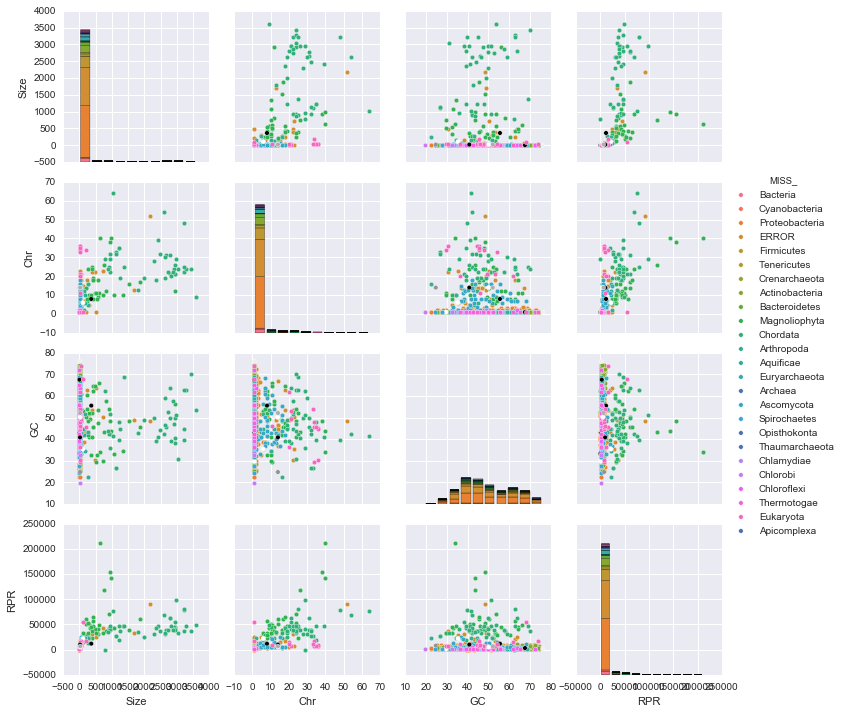

In [38]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df_C1D_VIS[['Size', 'Chr','GC','_Cat', 'RPR', 'MISS_']], hue="MISS_")
#sns.pairplot(df_C1D_VIS[['Size', 'Chr']]) #, hue="MISS_")

# As one may expect, ERRORS in classification occurs where there is the biggest overlap of the categories, 
# where size, Chromosome #, and RPR are small. Only GC% has an even error distribution over
# over the GC distribution. 



In [39]:
df_C1D_VIS.MISS_.value_counts()

Proteobacteria    851
ERROR             636
Firmicutes        191
Actinobacteria    117
Euryarchaeota      61
Bacteroidetes      60
Bacteria           55
Chordata           40
Ascomycota         38
Tenericutes        36
Magnoliophyta      35
Cyanobacteria      25
Crenarchaeota      19
Spirochaetes       19
Eukaryota          15
Thermotogae        12
Chloroflexi        10
Chlamydiae          7
Arthropoda          7
Aquificae           6
Chlorobi            5
Opisthokonta        3
Thaumarchaeota      3
Archaea             3
Apicomplexa         3
Name: MISS_, dtype: int64

In [40]:
# Baseline is 84%

print df_C1D_VIS._Cat.value_counts()
print 1968*1.0/len(df_C1D_VIS)

Proteobacteria    853
Firmicutes        348
Actinobacteria    250
Euryarchaeota     126
Bacteroidetes     112
Bacteria          111
Tenericutes        65
Cyanobacteria      48
Chordata           44
Ascomycota         43
Spirochaetes       39
Magnoliophyta      37
Crenarchaeota      37
Thermotogae        22
Apicomplexa        19
Eukaryota          18
Chloroflexi        15
Chlamydiae         14
Chlorobi           12
Aquificae          11
Arthropoda         11
Thaumarchaeota     10
Archaea             6
Opisthokonta        6
Name: _Cat, dtype: int64
0.871953921134


Create Dataframe with elements for Confusion Matrix

In [41]:
df_T0 = pd.DataFrame(df_miss._C.value_counts()) #False Negatives Counts
df_T1 = pd.DataFrame(df_miss.predict1.value_counts()) #False Positive Counts
df_T2 = pd.DataFrame(df_predict._C.value_counts()) #Actual Test Counts
df_T3 = pd.DataFrame(df_predict.predict1.value_counts()) #Actual Predition Counts

df_T0.columns= ['FN'] #rename prediction column
df_T1.columns= ['FP'] #rename prediction column
df_T3 = pd.concat([df_T0, df_T1, df_T2, df_T3], axis=1) #Concatenate value count dataframes for t
df_T3

,FN,FP,_C,predict1
0.0,2,610.0,442,1050.0
1.0,157,NaN,157,NaN
2.0,133,2.0,133,2.0
3.0,65,NaN,65,NaN
4.0,52,NaN,52,NaN
5.0,56,NaN,56,NaN
6.0,29,NaN,29,NaN
7.0,23,NaN,23,NaN
8.0,4,2.0,21,19.0
9.0,5,13.0,20,28.0


In [44]:
df_CAT2 = pd.concat([df_CAT1, df_T3], axis=1, join='outer', join_axes=None, ignore_index=False,
       keys=None, levels=None, names=None, verify_integrity=False)

#Replace NaNs with 0
df_CAT2 = df_CAT2.fillna(0)

#total predictions
p_tot = df_CAT2['_C'].sum()

#Missclassification Rate = (FN + FP)/total
df_CAT2['Miss%'] = 100.*(df_CAT2['FN']+df_CAT2['FP'])/p_tot
#Accuracy = 1- Misscalc
df_CAT2['Accu%'] = 100. - df_CAT2['Miss%']
#False Positive Rate = FP/actual
df_CAT2['FP%'] = df_CAT2['FP']*100./df_CAT2['_C']
#False Negative Rate = FN/actual
df_CAT2['FN%'] = df_CAT2['FN']*100./df_CAT2['_C']
df_CAT2

,0,FN,FP,_C,predict1,Miss%,Accu%,FP%,FN%
0,Proteobacteria,2,610.0,442,1050.0,54.207263,45.792737,138.009050,0.452489
1,Firmicutes,157,0.0,157,0.0,13.906112,86.093888,0.000000,100.000000
2,Actinobacteria,133,2.0,133,2.0,11.957484,88.042516,1.503759,100.000000
3,Euryarchaeota,65,0.0,65,0.0,5.757307,94.242693,0.000000,100.000000
4,Bacteroidetes,52,0.0,52,0.0,4.605846,95.394154,0.000000,100.000000
5,Bacteria,56,0.0,56,0.0,4.960142,95.039858,0.000000,100.000000
6,Tenericutes,29,0.0,29,0.0,2.568645,97.431355,0.000000,100.000000
7,Cyanobacteria,23,0.0,23,0.0,2.037201,97.962799,0.000000,100.000000
8,Chordata,4,2.0,21,19.0,0.531444,99.468556,9.523810,19.047619
9,Ascomycota,5,13.0,20,28.0,1.594331,98.405669,65.000000,25.000000


Redo Leave one out KFolds with Manual Multinomial Classifier

In [45]:
##### New Code ###############

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import patsy
from sklearn.cross_validation import LeaveOneOut, KFold

df_C1 = df_C1D[["Size","Chr","GC", "__Cat", "RPR"]] #Include target
formula_c =  '__Cat ~ (Size + Chr + GC + RPR - 1)' 
formula_c = str(formula_c)
print formula_c

Yf, Xf = patsy.dmatrices(formula_c, data=df_C1, return_type='dataframe')

Yf = np.ravel(Yf)

###NORMALIZE THE PREDICTOR VARIABLES!
Xfmat = ((Xf - Xf.mean())/ Xf.std()).values
Xfmat = pd.DataFrame(Xfmat)


# for explanation of below see: 
# https://en.wikipedia.org/wiki/Coefficient_of_determination
# calculate the total sum of squares
def calculate_r2(ytrue, ypred):
    ss_tot = np.sum([(y_ - np.mean(ytrue))**2 for y_ in ytrue])
    ss_res = np.sum([(yt - yp)**2 for yt, yp in zip(ytrue, ypred)])
    
    r2 = 1. - (ss_res/ss_tot)
    return r2
    

loo_inds = LeaveOneOut(Xf.shape[0])
Yf_test = []
loo_predictions1 = []
loo_predictions2 = []
loo_predictions3 = []

for train_inds, test_inds in loo_inds:
    #Xtest, Xtrain = Xfmat.iloc[test_inds, :], Xfmat.iloc[train_inds, :]
    Xtest, Xtrain = Xfmat.iloc[test_inds, :], Xfmat.iloc[train_inds, :]
    Ytest, Ytrain = Yf[test_inds], Yf[train_inds]
    
    model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs') #()
    model2 = DecisionTreeClassifier(max_depth=4, random_state=1)
    model3 = KNeighborsClassifier(weights='distance', n_neighbors=4) ##MODEL HERE    
    
    #knnr.fit(Xtrain, Ytrain) ## FIT MODEL HERE
    model1.fit(Xtrain, Ytrain)
    model2.fit(Xtrain, Ytrain)
    model3.fit(Xtrain, Ytrain)
        
    loo_predictions1.append(model1.predict(Xtest)[0])  ##MODEL PREDICTION
    loo_predictions2.append(model2.predict(Xtest)[0])  ##MODEL PREDICTION
    loo_predictions3.append(model3.predict(Xtest)[0])  ##MODEL PREDICTION
    
    Yf_test.append(Ytest)
    

loo1_cv_r2 = calculate_r2(Yf, loo_predictions1)
loo2_cv_r2 = calculate_r2(Yf, loo_predictions2)
loo3_cv_r2 = calculate_r2(Yf, loo_predictions3)
print loo1_cv_r2
print loo2_cv_r2
print loo3_cv_r2
#print Yf
#print loo_predictions

__Cat ~ (Size + Chr + GC + RPR - 1)
-0.0853974221845
0.0914248226578
-0.136410780188


In [46]:
def mk_RESULTS(loo_predictions, Yf):

    df_predict  = pd.DataFrame() #Dataframe with test values and predictions
    loo_predictions1_ = pd.DataFrame(data=pd.Series(loo_predictions), columns={"predict1"}) 
    Yf_ = pd.DataFrame(data=pd.Series(Yf), columns={"_C"}) 
    
    ## Dataframe with test values and predictions
    df_predict = pd.concat([Yf_, loo_predictions1_], axis=1)
    df_predict.head(5)

    ## Dataframe with just missclassification
    g = (def_comp_test(df_predict)) #Indexes of misclassifications
    df_miss = df_predict.loc[g]
    df_miss.head(5)

    ## Create Dataframe with elements for Confusion Matrix
    df_T0 = pd.DataFrame(df_miss._C.value_counts()) #False Negatives Counts
    df_T1 = pd.DataFrame(df_miss.predict1.value_counts()) #False Positive Counts
    df_T2 = pd.DataFrame(df_predict._C.value_counts()) #Actual Test Counts
    df_T3 = pd.DataFrame(df_predict.predict1.value_counts()) #Actual Predition Counts

    df_T0.columns= ['FN'] #rename prediction column
    df_T1.columns= ['FP'] #rename prediction column
    df_T3 = pd.concat([df_T0, df_T1, df_T2, df_T3], axis=1) #Concatenate value count dataframes for t
    df_T3

    ## Confusion Matrix-like Dataframe
    df_CAT2 = pd.concat([df_CAT1, df_T3], axis=1, join='outer', join_axes=None, ignore_index=False,
           keys=None, levels=None, names=None, verify_integrity=False)

    #Replace NaNs with 0
    df_CAT2 = df_CAT2.fillna(0)

    #total predictions
    p_tot = df_CAT2['_C'].sum()
    #print p_tot
    
    #Missclassification Rate = (FN + FP)/total
    df_CAT2['Miss%'] = 100.*(df_CAT2['FN']+df_CAT2['FP'])/p_tot
    #Accuracy = 1- Misscalc
    df_CAT2['Accu%'] = 100. - df_CAT2['Miss%']
    #False Positive Rate = FP/actual
    df_CAT2['FP%'] = df_CAT2['FP']*100./df_CAT2['_C']
    #False Negative Rate = FN/actual
    df_CAT2['FN%'] = df_CAT2['FN']*100./df_CAT2['_C']
    return df_CAT2



In [47]:
#RESULTS from LOGISITIC MULTINOMIAL
print "R2 score: ", loo1_cv_r2
mk_RESULTS(loo_predictions1, Yf)

R2 score:  -0.0853974221845


,0,FN,FP,_C,predict1,Miss%,Accu%,FP%,FN%
0,Proteobacteria,2,1247.0,853,2098.0,55.338946,44.661054,146.189918,0.234467
1,Firmicutes,348,0.0,348,0.0,15.418697,84.581303,0.000000,100.000000
2,Actinobacteria,249,5.0,250,6.0,11.253877,88.746123,2.000000,99.600000
3,Euryarchaeota,126,0.0,126,0.0,5.582632,94.417368,0.000000,100.000000
4,Bacteroidetes,112,0.0,112,0.0,4.962339,95.037661,0.000000,100.000000
5,Bacteria,111,0.0,111,0.0,4.918033,95.081967,0.000000,100.000000
6,Tenericutes,65,0.0,65,0.0,2.879929,97.120071,0.000000,100.000000
7,Cyanobacteria,48,0.0,48,0.0,2.126717,97.873283,0.000000,100.000000
8,Chordata,6,4.0,44,42.0,0.443066,99.556934,9.090909,13.636364
9,Ascomycota,14,24.0,43,53.0,1.683651,98.316349,55.813953,32.558140


In [49]:
#RESULTS from DECISION TREE
print "R2 score: ", loo2_cv_r2
mk_RESULTS(loo_predictions2, Yf)

R2 score:  0.0914248226578


,0,FN,FP,_C,predict1,Miss%,Accu%,FP%,FN%
0,Proteobacteria,221,617.0,853,1249.0,37.128932,62.871068,72.332943,25.908558
1,Firmicutes,159,415.0,348,604.0,25.431989,74.568011,119.252874,45.689655
2,Actinobacteria,194,51.0,250,107.0,10.855117,89.144883,20.400000,77.600000
3,Euryarchaeota,126,0.0,126,0.0,5.582632,94.417368,0.000000,100.000000
4,Bacteroidetes,112,0.0,112,0.0,4.962339,95.037661,0.000000,100.000000
5,Bacteria,111,0.0,111,0.0,4.918033,95.081967,0.000000,100.000000
6,Tenericutes,13,77.0,65,129.0,3.987594,96.012406,118.461538,20.000000
7,Cyanobacteria,48,0.0,48,0.0,2.126717,97.873283,0.000000,100.000000
8,Chordata,14,11.0,44,41.0,1.107665,98.892335,25.000000,31.818182
9,Ascomycota,10,9.0,43,42.0,0.841825,99.158175,20.930233,23.255814


In [50]:
#RESULTS from KNN
print "R2 score: ", loo3_cv_r2
mk_RESULTS(loo_predictions3, Yf)

R2 score:  -0.136410780188


,0,FN,FP,_C,predict1,Miss%,Accu%,FP%,FN%
0,Proteobacteria,363,515,853,1005,38.901196,61.098804,60.375147,42.555686
1,Firmicutes,246,266,348,368,22.684980,77.315020,76.436782,70.689655
2,Actinobacteria,196,166,250,220,16.038990,83.961010,66.400000,78.400000
3,Euryarchaeota,116,93,126,103,9.260080,90.739920,73.809524,92.063492
4,Bacteroidetes,110,83,112,85,8.551174,91.448826,74.107143,98.214286
5,Bacteria,102,83,111,92,8.196721,91.803279,74.774775,91.891892
6,Tenericutes,34,37,65,68,3.145769,96.854231,56.923077,52.307692
7,Cyanobacteria,47,32,48,33,3.500222,96.499778,66.666667,97.916667
8,Chordata,5,6,44,45,0.487373,99.512627,13.636364,11.363636
9,Ascomycota,13,17,43,47,1.329198,98.670802,39.534884,30.232558


In [51]:
t1 = model1
t2 = model2
t3 = model3
print t1.intercept_, t1.coef_[0]
#print t2.feature_importances_
#print t3.outputs_2d_

house_coefs = pd.DataFrame({'feature': Xf.columns, "LOG_coeff": t1.coef_[0], "DT_Feature_importance": t2.feature_importances_})
house_coefs

[ 3.81121346  2.47415249  2.28027709  1.34428068  1.7875307   1.54557771
 -0.52346758  1.21881533 -4.07334933  0.64803731  0.39589975 -2.58767441
  0.18693774 -0.08385524 -0.08496768 -2.2367077  -0.04741646 -0.4975344
 -0.49017607 -0.61516844 -0.80876878 -0.64486184 -1.52779546 -1.47097888] [-1.10517893 -1.45669738  0.13203503  1.27868305]


,DT_Feature_importance,LOG_coeff,feature
0,0.192710,-1.105179,Size
1,0.381454,-1.456697,Chr
2,0.015498,0.132035,GC
3,0.410337,1.278683,RPR


Set up for Next Model


In [52]:
# Logistic Regression on Kingdom for Classification Eukaryotes

df_C1 = df_C1D[["Size","Chr","GC", "RPR", "_Cat"]] 

Y = df_C1D["_Cat"] #target

In [53]:
##Patsy
df_C1 = df_C1D[["Size","Chr","GC", "_Cat", "RPR"]] #Include target
formula_c2 =  '_Cat ~ Size + Chr + GC + RPR - 1' #Score: 0.574834634511
formula_c2 = str(formula_c2)

In [54]:
from patsy import dmatrices

Yb2, Xb = dmatrices(formula_c2, data = df_C1D, return_type='dataframe')

###NORMALIZE THE PREDICTOR VARIABLES!
Xb_mat = ((Xb - Xb.mean())/ Xb.std()).values

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
def mk_RESULTS1(loo_predictions, Yf, Category):

    df_predict  = pd.DataFrame() #Dataframe with test values and predictions
    #loo_predictions1_ = pd.DataFrame(data=pd.Series(loo_predictions.values), columns={"predict1"}) 
    #Yf_ = pd.DataFrame(data=pd.Series(Yf.values), columns={"_C"}) 
    loo_predictions1_ = loo_predictions
    Yf_ = Yf
    
    Yf_.columns = ["_C"]
    loo_predictions1_.columns = ["predict1"]
    #print Yf_.columns
    
    ##CHECK
    #print "QQQ", Yf_[388], loo_predictions1_[388] 
    #print Yf_.head(5)
    
    ## Dataframe with test values and predictions
    df_predict = pd.concat([Yf_, loo_predictions1_], axis=1)
    #print "RRR"
    df_predict.columns = ["_C","predict1"]
    #print df_predict.head(5)
    #print df_predict.columns

    ## Dataframe with just missclassification
    g = (def_comp_test(df_predict)) #Indexes of misclassifications
    h = (def_comp_test2(df_predict)) #Indexes of correctly classified positive

    #print type(g)
    df_miss = df_predict.loc[g]
    #print df_miss.head(5)
    
    ##Seaborn plotly of missed categories
    df_miss_VIS = df_miss
    df_miss_VIS[('MISS_')] = 'ERROR'
    
    #Get categories "1"
    df_miss_not = df_predict.loc[h]
    #print df_miss_not.head(10)
    
    #Concatenate category 1 and miss dataframes
    df_miss_VIS1 = pd.DataFrame()
    df_miss_VIS1 = pd.concat([df_miss_not, df_miss_VIS], axis=0)
    index_list = df_miss_VIS1.index
    df_C1D_VIS1 = df_C1D.loc[index_list]
    
    #MERGE with original Dataframe with predictors
    df_C1D_VIS = pd.concat([df_C1D_VIS1, df_miss_VIS1], axis=1)
    
    
#     df_C1D_VIS = pd.merge(df_C1D[['Size', 'Chr','GC','Kingdom', 'RPR', 'King_C']], df_miss[['_C', 'predict1', 'MISS']],
#         left_index = True, right_index = True, how = "right") #right merge for category1

#     #MERGE with original Dataframe with predictors
#     df_C1D_VIS = pd.merge(df_C1D[['Size', 'Chr','GC','Kingdom', 'RPR', 'King_C']], df_miss_VIS1[['_C', 'predict1']],
#                            left_index = True, right_index = True, how = "right") #right merge for category1

#     Concatenate category 1 and miss dataframes
#     df_miss_VIS2 = pd.concat([df_C1D, df_miss_VIS1], axis=1)


    
#     #Concatenate category 1 and miss dataframes
#     df_miss_VIS2 = pd.concat([df_miss_VIS, df_miss_not], axis=0, join='outer', join_axes=None, ignore_index=False, 
#                             keys=None, levels=None, names=None, verify_integrity=False)
    
#     #MERGE with original Dataframe with predictors
#     df_C1D_VIS = pd.merge(df_C1D[['Size', 'Chr','GC','Kingdom', 'RPR', 'King_C']], df_miss_VIS2[['_C', 'predict1', 'MISS']],
#                            left_index = True, right_index = True, how = "right") #right merge for category1

    

    #Take MISS Column, if not MISS, fill with Category Name for Visualization in plotly
    df_C1D_VIS[('MISS_'+Category)] = df_C1D_VIS.apply(lambda df_C1D_VIS: ('CORRECT'+Category) if df_C1D_VIS['MISS_'] is np.nan else df_C1D_VIS['_Cat'], axis=1)

#     #print df_C1D_VIS.head(10)
    sns.pairplot(df_C1D_VIS[['Size', 'Chr','GC','_Cat', 'RPR', ('MISS_'+Category)]], hue=("MISS_"+Category), palette="muted")
    

    ## Create Dataframe with elements for Confusion Matrix
    df_T0 = pd.DataFrame(df_miss._C.value_counts()) #False Negatives Counts
    df_T1 = pd.DataFrame(df_miss.predict1.value_counts()) #False Positive Counts
    df_T2 = pd.DataFrame(df_predict._C.value_counts()) #Actual Test Counts
    df_T3 = pd.DataFrame(df_predict.predict1.value_counts()) #Actual Predition Counts

    df_T0.columns= ['FN'] #rename prediction column
    df_T1.columns= ['FP'] #rename prediction column
    df_T3 = pd.concat([df_T0, df_T1, df_T2, df_T3], axis=1) #Concatenate value count dataframes for t
    
    df_CAT2 = df_T3
    
    

    #Replace NaNs with 0
    df_CAT2 = df_CAT2.fillna(0)

    #total predictions
    p_tot = df_CAT2['_C'].sum()
    #print p_tot
    
    #Missclassification Rate = (FN + FP)/total
    df_CAT2['Miss%'] = 100.*(df_CAT2['FN']+df_CAT2['FP'])/p_tot
    #Accuracy = 1- Misscalc
    df_CAT2['Accu%'] = 100. - df_CAT2['Miss%']
    #False Positive Rate = FP/actual
    df_CAT2['FP%'] = df_CAT2['FP']*100./df_CAT2['_C']
    #False Negative Rate = FN/actual
    df_CAT2['FN%'] = df_CAT2['FN']*100./df_CAT2['_C']
    
    #Sensitivity/Recall: TP/Actual
    df_CAT2['Recall'] = (df_CAT2['predict1'] - df_CAT2['FP'])*100./df_CAT2['_C']
    #Precision: TP/Predicted Yes
    df_CAT2['Precision'] = (df_CAT2['predict1'] - df_CAT2['FP'])*100./df_CAT2['predict1']
    
#     ##return pd.DataFrame(df_CAT2.iloc[1]).T
    
    return df_CAT2.loc[1]

    #return df_miss_VIS1

In [68]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cross_validation import cross_val_score

for i, j in enumerate(Yb2.columns): #Loop through Classification 
# for i in [0]:
#     j = Yb2.columns[0]
    print "*********************************"
    print i, j
    Yb_0 = Yb2.iloc[:,i] #Target Series
    
    #Separate Logistic Model, kfold cv
    logreg0 = LogisticRegressionCV(cv=5) #Logistic Regression
    #logreg0 = DecisionTreeClassifier(max_depth=5) # Decision Tree
    
    #fit a model on the training data and test on the testing data
    #model0 = logreg0.fit(Xb_mat, Yb_0) #Logistic Regression
    
    logreg0.fit(X=Xb_mat, y=Yb_0) #Decision Tree
    scores = cross_val_score(estimator=logreg0, X=Xb_mat, y=Yb_0, cv=20, n_jobs=4) #Decision Tre
    
    #predictions
    predictions0 = pd.Series(logreg0.predict(Xb_mat)) #Logistic Regression


    
    #print "PREDICTIONS ", len(predictions0), len(Yb_0)
    
    print "ACTUALS"
    print Yb_0.value_counts()
    print "PREDICTIONS"
    print predictions0.value_counts()
    print "ACCURACY: ", accuracy_score(Yb_0, predictions0)
    print "PRECISION: ", precision_score(Yb_0, predictions0)
    print "RECALL: ", recall_score(Yb_0, predictions0)
    house_coefs = pd.DataFrame({'feature': Xb.columns, "coef": model0.coef_.ravel()})
    #print house_coefs
    print "+++++++++++++++++++++++++++++++"
    
    #print mk_RESULTS1(predictions0, Yb_0, j) #Recall < Precision, more FN than FP
    
    #df_A = (mk_RESULTS1(predictions0, Yb_0, j))
    
    #print df_A.loc[388]
    
    #print df_C1D.loc[181] 
    #print "ZZZ", predictions0[181] #, Yb_0[181]
    ##print df_A.loc[58]
    #print Yb_0

*********************************
0 _Cat[Actinobacteria]
ACTUALS
0.0    2007
1.0     250
Name: _Cat[Actinobacteria], dtype: int64
PREDICTIONS
0.0    2234
1.0      23
dtype: int64
ACCURACY:  0.894107221976
PRECISION:  0.739130434783
RECALL:  0.068
+++++++++++++++++++++++++++++++
*********************************
1 _Cat[Apicomplexa]


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 19 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=20.
  % (min_labels, self.n_folds)), Warning)


ACTUALS
0.0    2238
1.0      19
Name: _Cat[Apicomplexa], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.99158174568
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
2 _Cat[Aquificae]


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 11 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=20.
  % (min_labels, self.n_folds)), Warning)


ACTUALS
0.0    2246
1.0      11
Name: _Cat[Aquificae], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.995126273815
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
3 _Cat[Archaea]


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=20.
  % (min_labels, self.n_folds)), Warning)


ACTUALS
0.0    2251
1.0       6
Name: _Cat[Archaea], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.997341603899
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
4 _Cat[Arthropoda]
ACTUALS
0.0    2246
1.0      11
Name: _Cat[Arthropoda], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.995126273815
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
5 _Cat[Ascomycota]
ACTUALS
0.0    2214
1.0      43
Name: _Cat[Ascomycota], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.980948161276
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
6 _Cat[Bacteria]
ACTUALS
0.0    2146
1.0     111
Name: _Cat[Bacteria], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.950819672131
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
7 _Cat[Bacteroidetes]
ACTUALS
0.0    2145


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 14 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=20.
  % (min_labels, self.n_folds)), Warning)


ACTUALS
0.0    2243
1.0      14
Name: _Cat[Chlamydiae], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.993797075764
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
9 _Cat[Chlorobi]


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 12 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=20.
  % (min_labels, self.n_folds)), Warning)


ACTUALS
0.0    2245
1.0      12
Name: _Cat[Chlorobi], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.994683207798
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
10 _Cat[Chloroflexi]


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 15 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=20.
  % (min_labels, self.n_folds)), Warning)


ACTUALS
0.0    2242
1.0      15
Name: _Cat[Chloroflexi], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.993354009747
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
11 _Cat[Chordata]
ACTUALS
0.0    2213
1.0      44
Name: _Cat[Chordata], dtype: int64
PREDICTIONS
0.0    2223
1.0      34
dtype: int64
ACCURACY:  0.992910943731
PRECISION:  0.911764705882
RECALL:  0.704545454545
+++++++++++++++++++++++++++++++
*********************************
12 _Cat[Crenarchaeota]
ACTUALS
0.0    2220
1.0      37
Name: _Cat[Crenarchaeota], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.983606557377
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
13 _Cat[Cyanobacteria]
ACTUALS
0.0    2209
1.0      48
Name: _Cat[Cyanobacteria], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.978732831192
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
***********************

/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 18 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=20.
  % (min_labels, self.n_folds)), Warning)


ACTUALS
0.0    2239
1.0      18
Name: _Cat[Eukaryota], dtype: int64
PREDICTIONS
0.0    2247
1.0      10
dtype: int64
ACCURACY:  0.996455471865
PRECISION:  1.0
RECALL:  0.555555555556
+++++++++++++++++++++++++++++++
*********************************
15 _Cat[Euryarchaeota]
ACTUALS
0.0    2131
1.0     126
Name: _Cat[Euryarchaeota], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.944173681879
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
16 _Cat[Firmicutes]
ACTUALS
0.0    1909
1.0     348
Name: _Cat[Firmicutes], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.845813026141
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
17 _Cat[Magnoliophyta]
ACTUALS
0.0    2220
1.0      37
Name: _Cat[Magnoliophyta], dtype: int64
PREDICTIONS
0.0    2230
1.0      27
dtype: int64
ACCURACY:  0.991138679663
PRECISION:  0.814814814815
RECALL:  0.594594594595
++++++++++++++++++++++++++++++

/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=20.
  % (min_labels, self.n_folds)), Warning)


ACTUALS
0.0    2247
1.0      10
Name: _Cat[Thaumarchaeota], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.995569339832
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++
*********************************
23 _Cat[Thermotogae]
ACTUALS
0.0    2235
1.0      22
Name: _Cat[Thermotogae], dtype: int64
PREDICTIONS
0.0    2257
dtype: int64
ACCURACY:  0.99025254763
PRECISION:  0.0
RECALL:  0.0
+++++++++++++++++++++++++++++++


In [70]:
df_sub2_.head(4)

,Unnamed: 0,Unnamed: 0.1,Organism,Kingdom,Size,Chr,url,RPR,GC,Classes,Classsub1,Taxonomy,_Cat
0,0,0,'Deinococcus soli' Cha et al. 2014,Bacteria,3.23698,1.0,/genome/38191,3038.0,70.2,"[[[, Deinococcus, Deinococcaceae, Deinococcale...","[Deinococcus, Deinococcaceae, Deinococcales, D...",Bacteria,Bacteria
1,1,12,Acaryochloris marina,Bacteria,8.36160,1.0,/genome/1179,7179.0,35.5,"[[[, Acaryochloris, FamilyI, SubsectionI, Cyan...","[Acaryochloris, FamilyI, SubsectionI, Cyanobac...",Bacteria,Bacteria
2,2,13,Acetobacter,Bacteria,3.10640,1.0,/genome/18005,1775.0,57.1,"[[[, Acetobacteraceae, Rhodospirillales, Alpha...","[Acetobacter, Acetobacteraceae, Rhodospirillal...",Bacteria,Bacteria
3,3,14,Acetobacter ghanensis,Bacteria,2.84394,1.0,/genome/42306,2437.0,53.9,"[[[, Acetobacter, Acetobacteraceae, Rhodospiri...","[Acetobacter, Acetobacteraceae, Rhodospirillal...",Bacteria,Bacteria


In [206]:
#df_sub2_['Kingdom']

Multinomial Classification for predicting NCBI labeled 'Kingdoms'¶

For a first pass that has an existing classification from the NCBI database, we can classify according to Kingdom using several models. This is a supervised multinomial classification problem, so it makes sense to use the machine learning models of Logistic Regression, Decision Tree Classifiers, and KNN. The code below using the simple linear formula 'C(Kingdom) ~ Size + Chr + GC + RPR - 1' takes advantages of patsies to arrange the data in matricies for analysis. The predictor variables are normalized so that we can compare relative importance between the predictor variables of Size (Nucleotide length), Chromosome number (Chr), Guanine Cytosine % (GC), and Protein count (RPR).

Manually assign Multinomial categories of Kingdoms